Medical Price Prediction

In the given Project we have to predict the insurance cost to make money.

Medical expenses are difficult to estimate because the most costly conditions are rare and seemingly random. Still, some conditions are more prevalent for certain segments of the population.

The goal of this analysis is to use patient data to estimate the average medical care expenses for such population segments.

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [5]:
data = pd.read_csv("C:\\Users\\FOLIO\\Downloads/insurance.csv")
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


Reading the Data

In [6]:
#info gives the information about the datatypes and data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
data.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [8]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [9]:
data.sample(6)

,age,sex,bmi,children,smoker,region,charges
57,18,male,31.680,2,yes,southeast,34303.16720
858,25,female,32.230,1,no,southeast,18218.16139
176,38,male,27.835,2,no,northwest,6455.86265
469,18,female,24.090,1,no,southeast,2201.09710
608,28,male,26.980,2,no,northeast,4435.09420
948,42,male,31.255,0,no,northwest,6358.77645


In [10]:
data.shape

(1338, 7)

In [11]:
data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [12]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [13]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [14]:
data.duplicated().sum()

1

In [15]:
#Removing the duplication
data.drop_duplicates()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [22]:
# To get valce_count of categorical variable
for i in data.columns:
    if data[i].dtype == "object":
        print(data[i].value_counts())
        print()

male      676
female    662
Name: sex, dtype: int64

no     1064
yes     274
Name: smoker, dtype: int64

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64



In [23]:
# Now convert categorical data into numarical data
from sklearn.preprocessing import LabelEncoder
lab=LabelEncoder()
for i in data.columns:
    if data[i].dtype=="object":
        data[i]=lab.fit_transform(data[i])
data

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


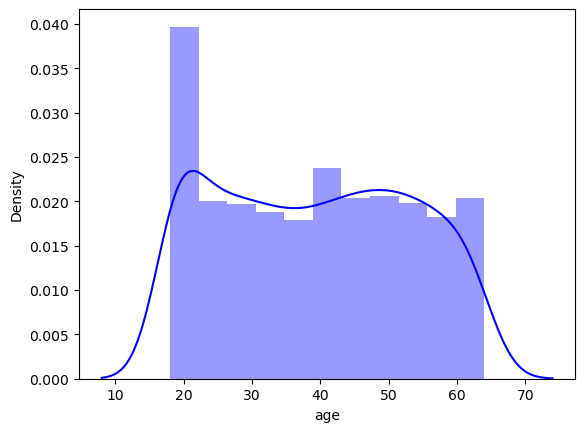

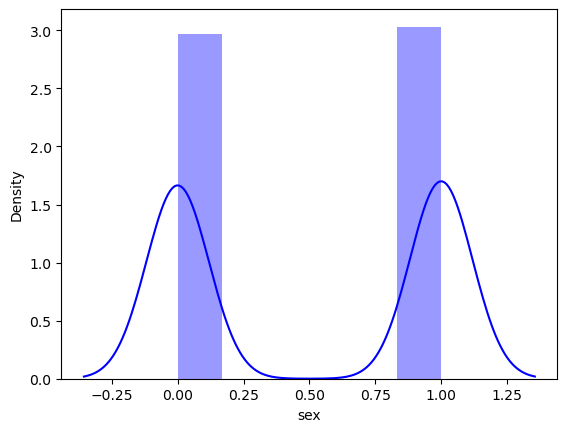

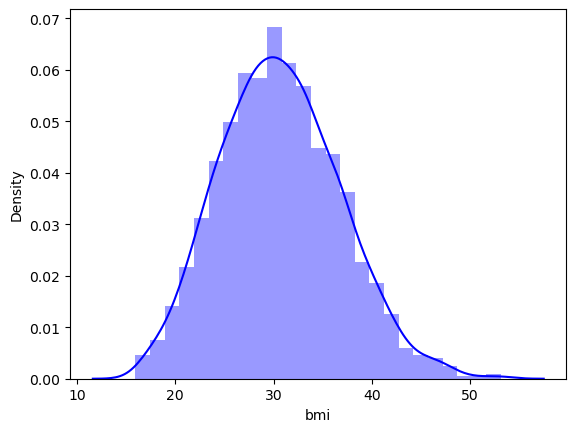

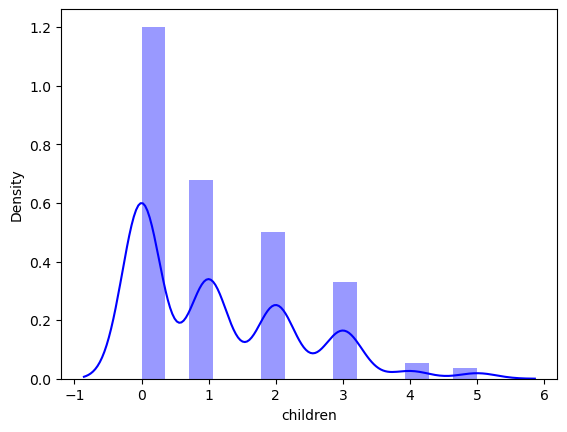

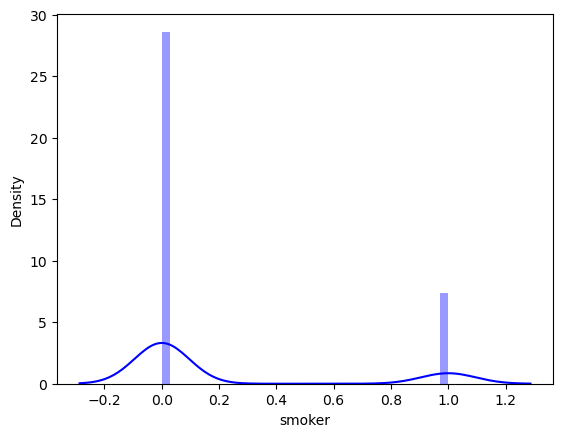

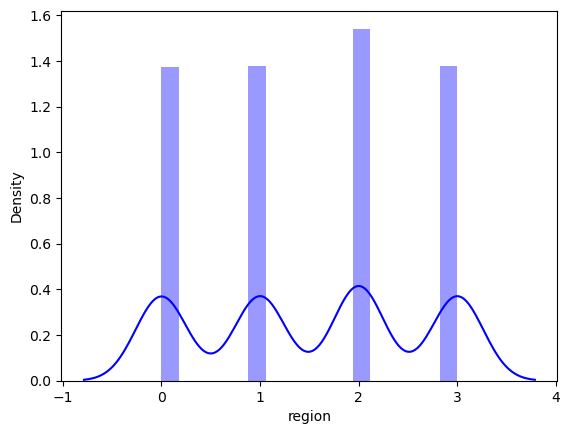

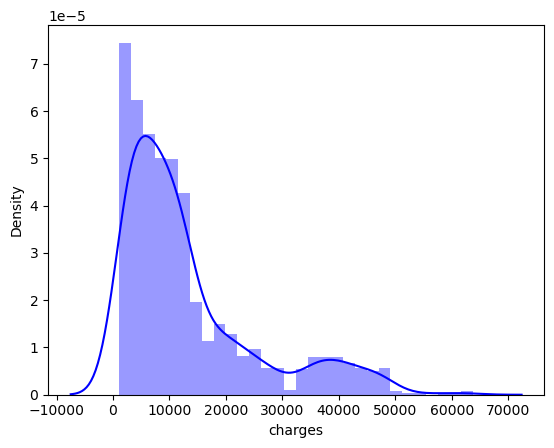

In [24]:
# to see the skewness in the data
for i in data.columns:
    sns.distplot(data[i],color="blue")
    plt.show()


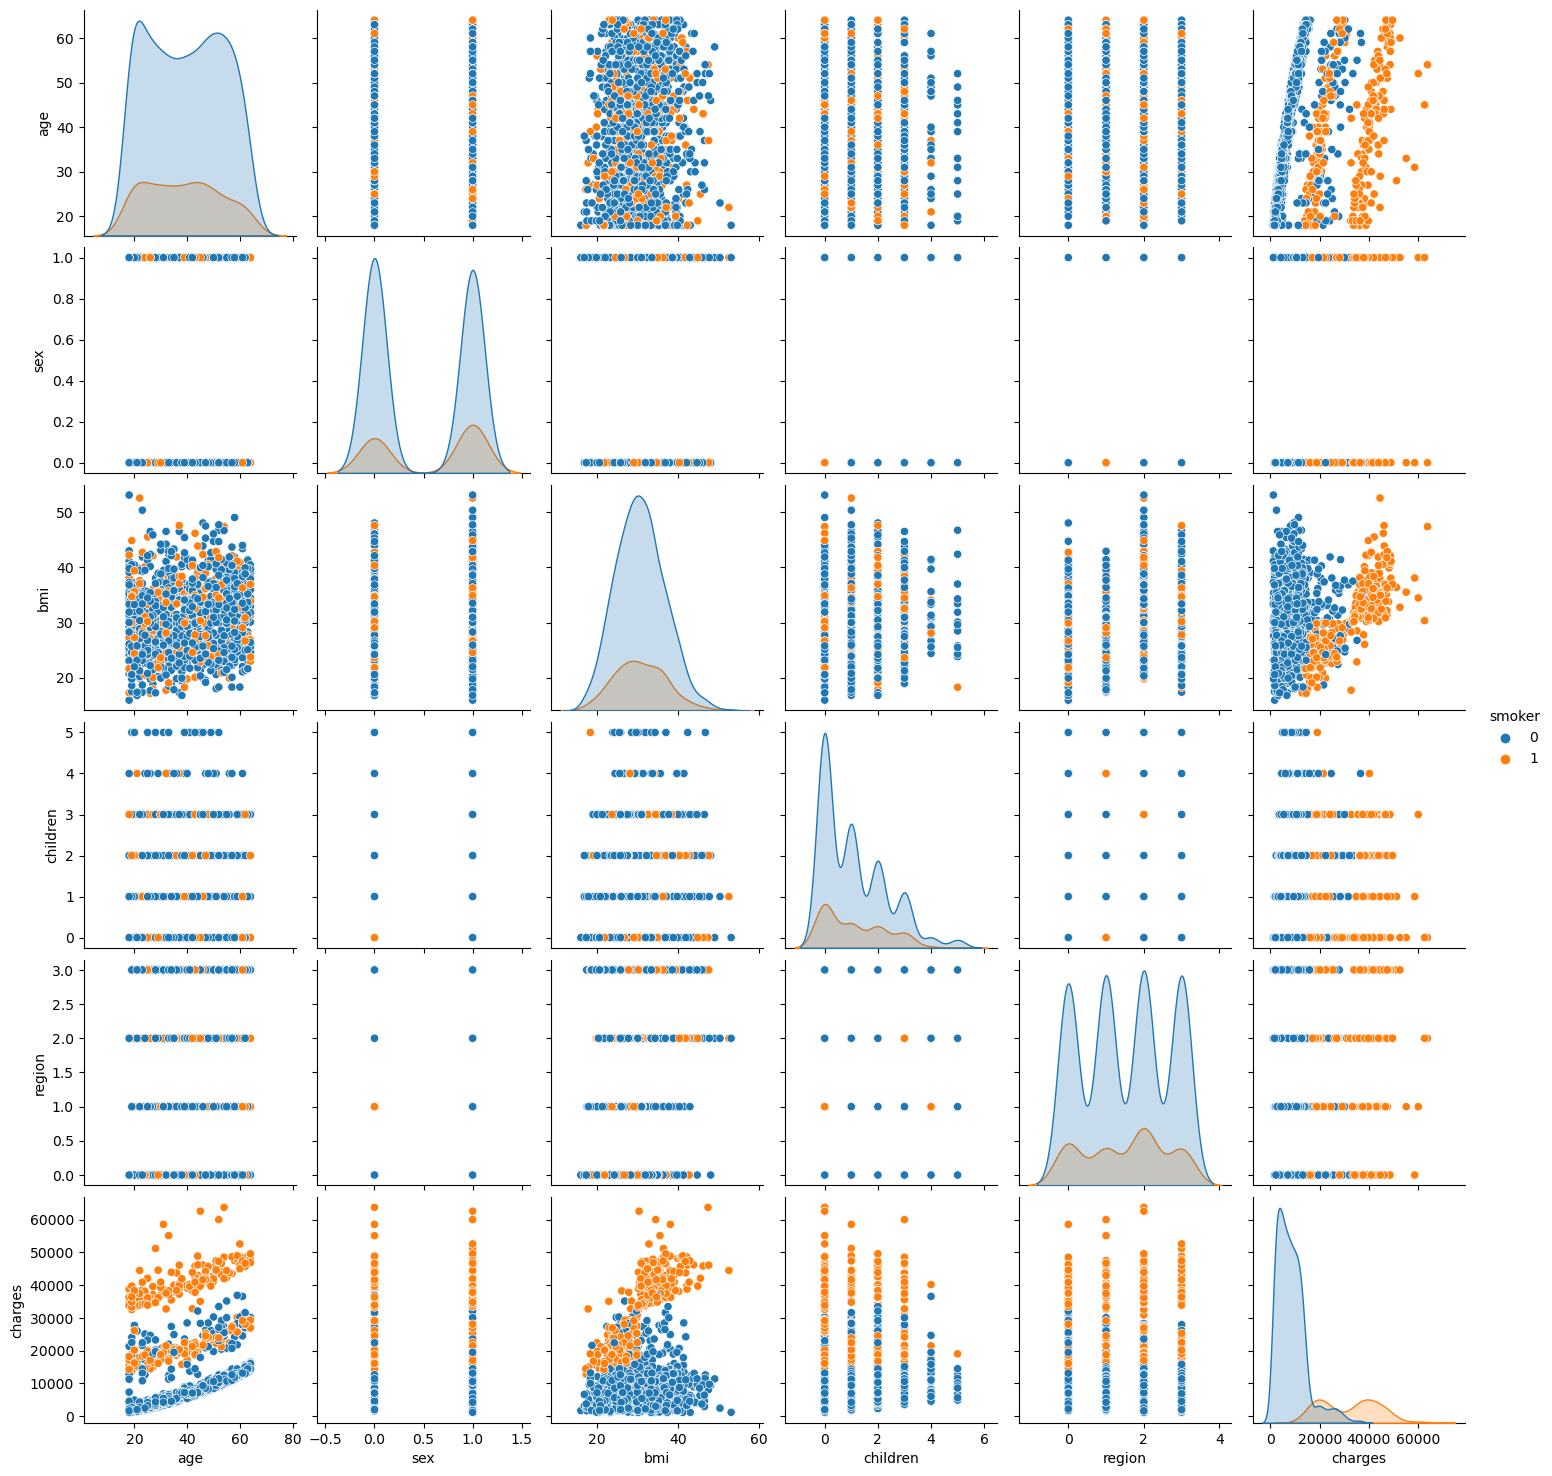

In [26]:
# to see the distribution of data we plot pairplot
sns.pairplot(data=data,hue="smoker")

<AxesSubplot:>

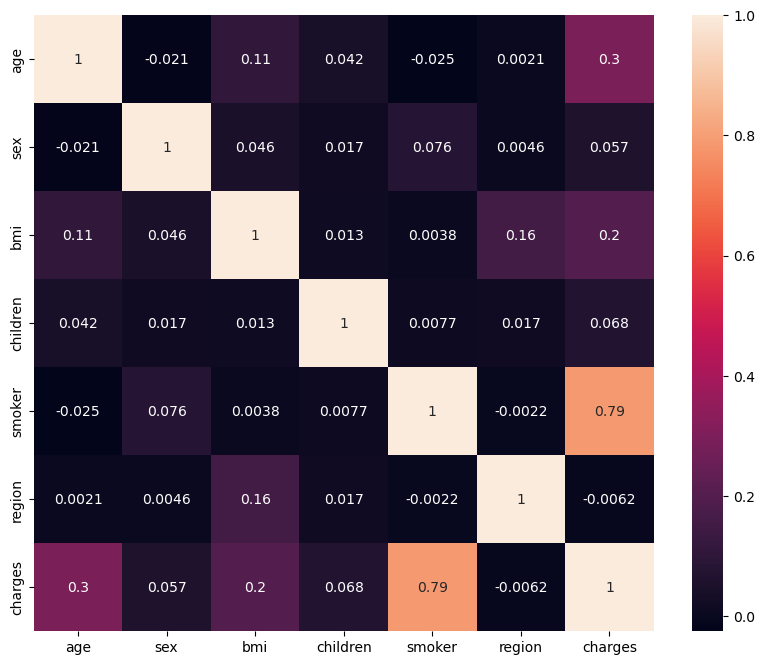

In [27]:
#now to plot the heatmap to the correlation of the data
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(),annot=True)

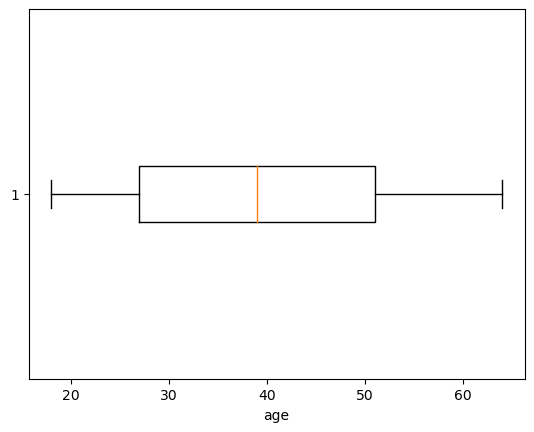

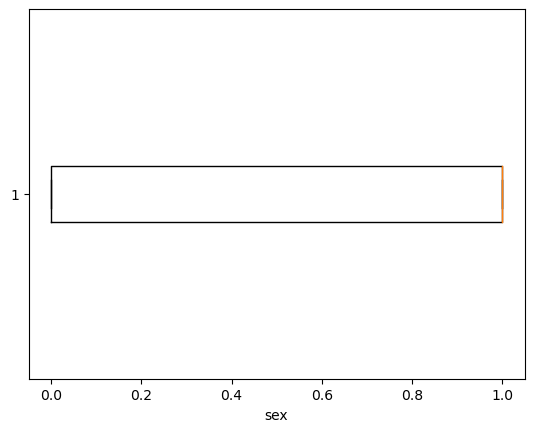

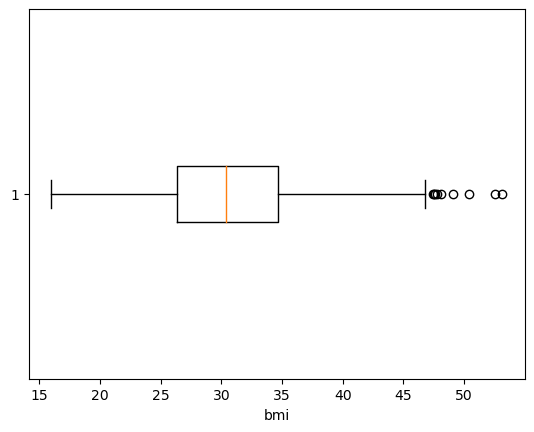

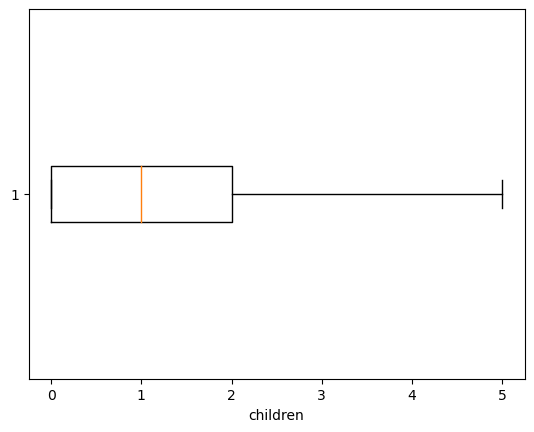

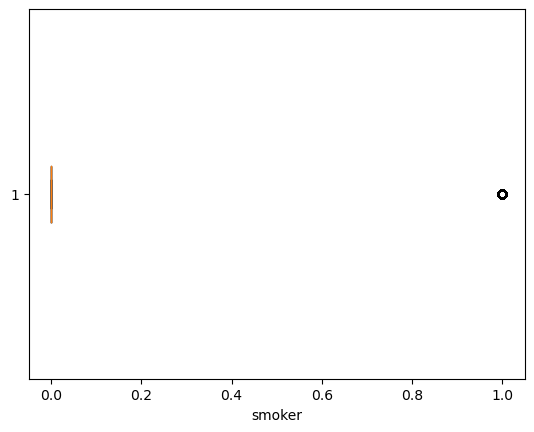

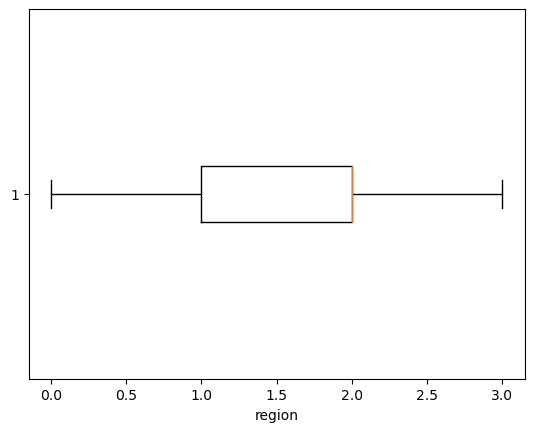

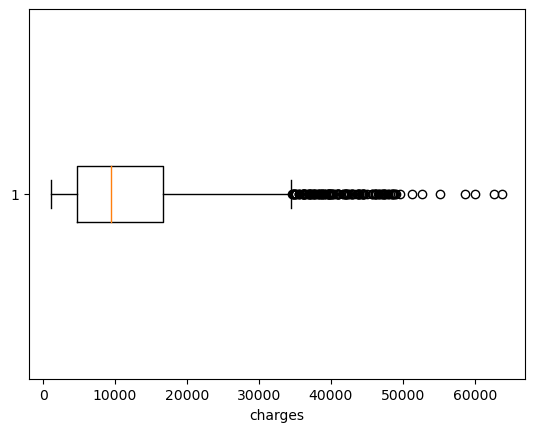

In [28]:
# plotting boxplot for the outliers
for i in data.columns:
    plt.boxplot(data[i], vert=False)
    plt.xlabel(i)
    plt.show()

In [30]:
# Now we treat outliers with IQR method
Q1=np.quantile(data["bmi"],0.25)
Q2=np.quantile(data["bmi"],0.50)
Q3=np.quantile(data["bmi"],0.75)
Q4=np.quantile(data["bmi"],1.0)
IQR=Q3-Q1
print("IQR=",IQR)
Lower_Fence=Q1-(1.5*IQR)
Upper_Fence=Q3+(1.5*IQR)
print("Lower_Fence=",Lower_Fence)
print("Upper_Fence=",Upper_Fence)

IQR= 8.3975
Lower_Fence= 13.7
Upper_Fence= 47.290000000000006


<AxesSubplot:xlabel='bmi'>

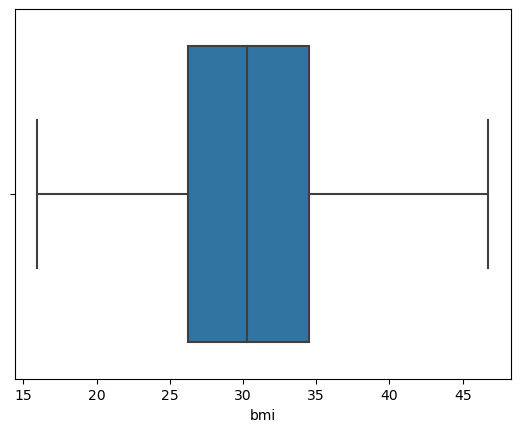

In [31]:
# Now outliers is remove from the data
df=data.loc[(data["bmi"]<Upper_Fence) & (data["bmi"]>Lower_Fence)]
sns.boxplot(data=df,x="bmi")

In [32]:
# Drop the divide the data in x & y, all columns in x except "charges", y take "charges" column
x=data.drop(["charges"],axis=1)
y=data["charges"]
print(x)

      age  sex     bmi  children  smoker  region
0      19    0  27.900         0       1       3
1      18    1  33.770         1       0       2
2      28    1  33.000         3       0       2
3      33    1  22.705         0       0       1
4      32    1  28.880         0       0       1
...   ...  ...     ...       ...     ...     ...
1333   50    1  30.970         3       0       1
1334   18    0  31.920         0       0       0
1335   18    0  36.850         0       0       2
1336   21    0  25.800         0       0       3
1337   61    0  29.070         0       1       1

[1338 rows x 6 columns]


In [33]:
print(y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


In [34]:
# Use standard scaler for scale all variable in between -3 to 3
from sklearn.preprocessing import StandardScaler
sta=StandardScaler()
X=sta.fit_transform(x)
print(X)

[[-1.43876426 -1.0105187  -0.45332    -0.90861367  1.97058663  1.34390459]
 [-1.50996545  0.98959079  0.5096211  -0.07876719 -0.5074631   0.43849455]
 [-0.79795355  0.98959079  0.38330685  1.58092576 -0.5074631   0.43849455]
 ...
 [-1.50996545 -1.0105187   1.0148781  -0.90861367 -0.5074631   0.43849455]
 [-1.29636188 -1.0105187  -0.79781341 -0.90861367 -0.5074631   1.34390459]
 [ 1.55168573 -1.0105187  -0.26138796 -0.90861367  1.97058663 -0.46691549]]


In [35]:
# Spliting data into training and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,train_size=.8,random_state=20)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((1070, 6), (268, 6), (1070,), (268,))

In [36]:
# let see the coefficient and Intercept
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(x_train,y_train)
print("slope value are="+str(lm.coef_))
print("The intercept is="+str(lm.intercept_))

slope value are=[3484.76002347  -78.86191297 2070.28309964  684.15437404 9571.32934484
 -368.09882563]
The intercept is=13375.400100970845


In [37]:
# Predicting "y_pred" that is "charges" column
y_pred=lm.predict(x_test)
y_pred

array([13196.9358584 , 10037.56247782, 11693.19055205, 18033.62030664,
        4629.54200824,  2174.69963192,  2136.2366869 , 11908.14958186,
       38373.2187102 , 11295.7700803 , 16288.50190433, 28940.03202557,
        3271.37952943, 13160.35499614, 29788.41354011,  9683.23390953,
       32100.45515279, 12275.42602464,  3049.2971247 , 11122.71605301,
       38984.50466828,  8217.07650235, 11624.70707714,  2327.18516136,
       12608.54279746,  6201.97203832, 32879.84118544, 12820.13932902,
       28692.54666772, 12041.95048203, 10134.86178528,  2817.61385266,
       38391.19421273, 38619.4789662 , 14788.22862233,  7039.47872064,
        3911.24515594,   970.04163198, 31876.89956959, 25990.42824859,
       12263.57757925, 16355.92894147,  1857.14947141,  1174.59046284,
       13376.53433911,  8540.34546148, 10737.2937991 ,  5895.7301352 ,
       38156.41306051,  2378.42036946, 12187.59641569, 35658.13064222,
       10076.80369243, 11506.93865618,  7334.50136612, 27350.34741037,
      

In [38]:
# Performance Matrics 
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
rmse=(mse)**1/2
adjr2=1-(1-r2)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

print("MSE=",mse)
print("MAE=",mae)
print("R2=",r2)
print("RMSE=",rmse)
print("ADJR2=",adjr2)

MSE= 30665429.779517215
MAE= 4035.601499677529
R2= 0.7960709949046044
RMSE= 15332714.889758607
ADJR2= 0.7913829717989631


In [39]:
lm.score(x_train,y_train)

0.7386289022941568

In [40]:
lm.score(x_test,y_test)

0.7960709949046044

In [41]:
# Ridge resgression
from sklearn.linear_model import Ridge
rg=Ridge()
rg.fit(x_train,y_train)
print("slope value are="+str(rg.coef_))
print("The intercept is="+str(rg.intercept_))

slope value are=[3481.3577173   -78.17163959 2068.65452706  683.66842074 9562.20137607
 -367.46954329]
The intercept is=13375.246304262264


In [42]:
y_pred_rg=rg.predict(x_test)
y_pred_rg

array([13197.35897783, 10039.18916871, 11695.78084545, 18030.65441861,
        4638.44609205,  2184.8934278 ,  2145.51609642, 11908.87289437,
       38349.5565476 , 11298.10861972, 16285.08415238, 28925.73463275,
        3281.0369693 , 13161.60660973, 29772.19879822,  9686.48628504,
       32081.27845861, 12275.70847625,  3058.37931972, 11124.36912122,
       38959.70583241,  8220.74671384, 11625.01630067,  2337.63985801,
       12611.34321192,  6208.99467888, 32860.05469086, 12819.87726673,
       28678.00529388, 12042.63377002, 10137.65671926,  2828.31566576,
       38366.78240416, 38595.87288809, 14786.41837745,  7045.30275239,
        3920.06977952,   980.94772668, 31857.75753194, 25976.71317955,
       12264.59371615, 16352.63570204,  1868.09323511,  1185.33192768,
       13377.06925141,  8545.69832024, 10739.55003087,  5901.83126987,
       38132.6502121 ,  2387.8383125 , 12189.37833151, 35635.92701396,
       10078.53699322, 11508.78533368,  7339.5718576 , 27336.46759301,
      

In [43]:
rg.score(x_test,y_test)

0.7960275997894679

In [44]:
rg.score(x_train,y_train)

0.7386282402718244

In [45]:
from sklearn.linear_model import Lasso
las=Lasso()
las.fit(x_train,y_train)
print("slope value are="+str(las.coef_))
print("The intercept is="+str(las.intercept_))

slope value are=[3483.85066401  -77.75498496 2069.15086631  683.16904472 9570.23739266
 -366.92370316]
The intercept is=13375.358447050045


In [46]:
y_pred_las=las.predict(x_test)
y_pred_las

array([13197.23438192, 10036.15375494, 11694.63482636, 18032.01216699,
        4631.90093376,  2178.03678647,  2138.32812011, 11907.552182  ,
       38367.82353978, 11296.03358626, 16283.88610943, 28940.88136571,
        3272.72708108, 13161.7169009 , 29785.79744423,  9683.56855894,
       32096.02916096, 12271.28243175,  3052.79449848, 11123.40916207,
       38980.66165603,  8217.99056774, 11623.87963209,  2329.85059516,
       12606.75882272,  6202.2134934 , 32877.67467173, 12817.21806567,
       28690.63245686, 12039.39439667, 10134.67585103,  2822.20940139,
       38385.56678922, 38617.58877662, 14784.23101522,  7039.6283822 ,
        3912.73940457,   974.39235287, 31872.80868473, 25987.91431471,
       12264.59939929, 16353.67949204,  1861.23745728,  1178.39309012,
       13376.81483369,  8543.08833012, 10736.41440982,  5893.86946303,
       38152.87082933,  2382.13221118, 12187.59556517, 35655.23565584,
       10074.72443741, 11508.0195389 ,  7334.83388544, 27349.29989719,
      

In [47]:
las.score(x_train,y_train)

0.7386288582821197

In [48]:
las.score(x_test,y_test)

0.7960687803220288

In [49]:
from sklearn.linear_model import ElasticNet
en=ElasticNet()
en.fit(x_train,y_train)
print("slope value are="+str(en.coef_))
print("The intercept is="+str(en.intercept_))

slope value are=[2290.65140184   94.79951492 1455.9939022   493.25693328 6338.8846933
 -172.76489631]
The intercept is=13320.902280808408


In [50]:
y_pred_en=en.predict(x_test)
y_pred_en

array([13300.5941725 , 10768.55918789, 12487.46238437, 16808.41051357,
        7697.12145446,  5826.06821987,  5563.27869349, 12228.64407072,
       29952.05062799, 12064.78678861, 15136.02568372, 23797.07996894,
        6661.26843593, 13475.04767376, 24095.97022843, 10841.35041958,
       25436.51147062, 12442.30179657,  6338.55112473, 11741.06308551,
       30238.22809558,  9642.82065342, 11871.53189046,  6011.34764823,
       13355.15656587,  8642.49806552, 25992.3654301 , 12800.75010685,
       23523.14883028, 12334.62528986, 11147.98057588,  6519.04107554,
       29797.2855851 , 30194.04087063, 14184.87289206,  9112.41164429,
        7031.46990569,  4921.84985904, 25245.08666538, 21297.68910913,
       12609.97754309, 15231.28191862,  5713.14418969,  5064.34852002,
       13490.75522929, 10338.52570956, 11553.41065468,  8149.38498099,
       29735.24172505,  5819.77551536, 12727.55168317, 27890.64132315,
       10829.00196574, 12134.85007397,  9193.13135694, 22481.14890422,
      

In [51]:
en.score(x_test,y_test)

0.6963280240963171

In [52]:
en.score(x_train,y_train)

0.6553804260175538

Conclusion

It seems that the machine learning model has performed very well on the test set. The low values of MSE, MAE, and RMSE indicate that the model's predictions are very close to the actual values in the test set. The R-squared (R2) value of 1.0 indicates that the model has perfectly fit the test set, and the adjusted R-squared (ADJR2) value of 1.0 suggests that the model is not overfitting to the data.

